In [5]:
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None

In [19]:
%matplotlib inline

In [6]:
from os import listdir

for filename in listdir('output'):
    if '_grid_search' in filename:
        print(filename)

xgb_bo2_w2v_newcat_grid_search.csv
catb_bo2_newcat_grid_search.csv
xgb_bo2_w2v_grid_search.csv
lgb_bo2_newcat_grid_search.csv
lgb_grid_search.csv
xgb_grid_search.csv


In [9]:
gs_lgb_res = pd.read_csv('output/lgb_grid_search.csv', index_col='Unnamed: 0').sort_values(by=['val_auc'], ascending=False)
#0.829998
gs_lgb_res.head(2)

,num_leaves,feature_fraction,bagging_fraction,max_depth,lambda_l1,lambda_l2,min_split_gain,scale_pos_weight,min_child_weight,val_auc,learning_rate,feature_fraction_seed,bagging_seed,boosting,metric,objective,num_threads,best_round
3VXI,60,0.162771,0.863025,9,0.124696,0.213915,0.070922,1.046659,45.939472,0.797427,0.01,1992,1992,gbdt,auc,binary,15,2607
pC2i,58,0.104876,0.923375,6,0.872477,0.964694,0.003481,1.396140,19.132712,0.797317,0.01,1992,1992,gbdt,auc,binary,15,3501


In [8]:
gs_lgb2_res = pd.read_csv('output/lgb_bo2_newcat_grid_search.csv', index_col='Unnamed: 0').sort_values(by=['val_auc'], ascending=False)
#0.829998
gs_lgb2_res.head(20)

,bagging_fraction,bagging_seed,best_round,boosting,cv,data_name,feature_fraction,feature_fraction_seed,gs_timespent,lambda_l1,lambda_l2,learning_rate,max_depth,metric,min_child_weight,min_split_gain,num_threads,objective,pred_timespent,scale_pos_weight,timestamp,val_auc
v6TW,0.70,30205507,2563,gbdt,True,bo2_newcat,0.11,30205507,2:57:50,0.6,1.5,0.015,8,auc,49,0.005,8,binary,0:20:40,1.6,2018-07-23 17:33:29,0.796959
KHEf,0.90,15455281,3873,gbdt,True,bo2_newcat,0.14,15455281,3:12:37,0.8,1.4,0.013,5,auc,47,0.071,8,binary,0:22:28,1.5,2018-07-23 13:58:23,0.796955
mWgV,0.86,36232133,2417,gbdt,True,bo2_newcat,0.11,36232133,2:17:00,0.2,0.7,0.017,6,auc,4,0.016,8,binary,0:15:47,1.7,2018-07-24 06:51:13,0.796890
FAjg,0.87,42295055,3154,gbdt,True,bo2_newcat,0.20,42295055,3:18:12,0.2,0.9,0.011,7,auc,23,0.046,8,binary,0:23:04,1.8,2018-07-21 18:03:09,0.796862
Oc1f,0.83,21570156,3040,gbdt,True,bo2_newcat,0.28,21570156,3:22:46,0.8,1.2,0.013,8,auc,37,0.002,8,binary,0:23:03,1.9,2018-07-24 09:24:01,0.796691
izAm,0.90,36092873,3363,gbdt,True,bo2_newcat,0.29,36092873,3:39:50,0.3,0.5,0.011,9,auc,32,0.067,8,binary,0:25:53,1.9,2018-07-22 22:08:02,0.796563
VWdh,0.80,24220088,2738,gbdt,True,bo2_newcat,0.18,24220088,2:50:20,0.2,1.7,0.014,7,auc,21,0.010,8,binary,0:19:50,1.6,2018-07-24 03:41:02,0.796478
DCLH,0.73,44340117,9872,gbdt,True,bo2_newcat,0.18,44340117,6:05:13,0.9,0.7,0.007,4,auc,3,0.068,8,binary,0:43:48,1.9,2018-07-23 20:52:00,0.796186
ttl7,0.79,26448023,2549,gbdt,True,bo2_newcat,0.25,26448023,2:34:42,0.3,1.5,0.014,7,auc,8,0.074,8,binary,0:17:45,1.7,2018-07-23 11:05:55,0.796078
a0w0,0.89,33654004,4999,gbdt,True,bo2_newcat,0.19,33654004,6:10:29,0.8,0.8,0.004,9,auc,44,0.024,8,binary,0:45:32,1.5,2018-07-23 02:13:46,0.796064


In [10]:
temp = pd.concat([gs_lgb2_res, gs_lgb_res], axis=0)

/home/kai/anaconda3/envs/tf_gpu/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [13]:
temp.head(50).sort_values(by=['val_auc'], ascending=False)

,bagging_fraction,bagging_seed,best_round,boosting,cv,data_name,feature_fraction,feature_fraction_seed,gs_timespent,lambda_l1,lambda_l2,learning_rate,max_depth,metric,min_child_weight,min_split_gain,num_leaves,num_threads,objective,pred_timespent,scale_pos_weight,timestamp,val_auc
3VXI,0.863025,1992,2607,gbdt,NaN,NaN,0.162771,1992,NaN,0.124696,0.213915,0.010,9,auc,45.939472,0.070922,60.0,15,binary,NaN,1.046659,NaN,0.797427
pC2i,0.923375,1992,3501,gbdt,NaN,NaN,0.104876,1992,NaN,0.872477,0.964694,0.010,6,auc,19.132712,0.003481,58.0,15,binary,NaN,1.396140,NaN,0.797317
dQTL,0.844538,1992,3512,gbdt,NaN,NaN,0.107829,1992,NaN,0.874085,0.853955,0.010,9,auc,8.539174,0.023892,40.0,15,binary,NaN,1.126295,NaN,0.797314
ksIj,0.809812,1992,3148,gbdt,NaN,NaN,0.106348,1992,NaN,0.299851,0.273796,0.010,10,auc,49.297429,0.041132,39.0,15,binary,NaN,1.567663,NaN,0.797274
1CKg,0.965983,1992,2694,gbdt,NaN,NaN,0.133714,1992,NaN,0.566902,0.958432,0.010,8,auc,49.451916,0.055252,60.0,15,binary,NaN,1.697434,NaN,0.797217
qHLQ,0.833346,1992,3147,gbdt,NaN,NaN,0.100759,1992,NaN,0.162954,0.007832,0.010,8,auc,21.798544,0.077570,39.0,15,binary,NaN,1.354354,NaN,0.797171
fvQF,0.967610,1992,2607,gbdt,NaN,NaN,0.101975,1992,NaN,0.446857,0.922975,0.010,10,auc,5.364207,0.059940,59.0,15,binary,NaN,1.681656,NaN,0.797059
9QmW,0.887414,1992,3602,gbdt,NaN,NaN,0.102292,1992,NaN,0.066582,0.183852,0.010,8,auc,49.847635,0.005318,43.0,15,binary,NaN,1.083214,NaN,0.797026
8MFd,0.840760,1992,0,gbdt,NaN,NaN,0.192853,1992,NaN,0.044563,0.303688,0.010,8,auc,49.378524,0.021711,39.0,15,binary,NaN,1.015113,NaN,0.796964
v6TW,0.700000,30205507,2563,gbdt,True,bo2_newcat,0.110000,30205507,2:57:50,0.600000,1.500000,0.015,8,auc,49.000000,0.005000,NaN,8,binary,0:20:40,1.600000,2018-07-23 17:33:29,0.796959


In [4]:
gs_catb1_res = pd.read_csv('output/catb_bo2_newcat_grid_search.csv', index_col='Unnamed: 0').sort_values(by=['val_AUC'], ascending=False)
#0.829998
gs_catb1_res.head(20)

,cv,data_name,depth,eval_metric,gs_timespent,iterations,l2_leaf_reg,logging_level,pred_timespent,random_seed,thread_count,timestamp,train_AUC,val_AUC
WobY,True,bo2_newcat,6,AUC,7:52:01,6483,2.8,Verbose,2:12:22,2231986,15,2018-07-23 21:47:51,0.886156,0.790756
t7zz,True,bo2_newcat,5,AUC,2:49:45,4997,0.4,Verbose,1:27:10,11505009,15,2018-07-23 16:07:14,0.857453,0.790182


In [17]:
for col in temp.columns:
    try:
        print(col, temp[col].max(), temp[col].min())
    except:
        print(col, 'NA')
        pass

bagging_fraction 0.985119327658532 0.7
bagging_seed 44340117 1992
best_round 9872 0
boosting gbdt gbdt
cv True True
data_name NA
feature_fraction 0.4857627788344134 0.1
feature_fraction_seed 44340117 1992
gs_timespent NA
lambda_l1 0.978618342232764 0.006961389282130637
lambda_l2 1.7 0.007831766942599015
learning_rate 0.017 0.003
max_depth 10 4
metric auc auc
min_child_weight 49.848645100282276 2.0
min_split_gain 0.099 0.002
num_leaves 60.0 38.0
num_threads 15 8
objective binary binary
pred_timespent NA
scale_pos_weight 2.936749865655784 1.0077547155540667
timestamp NA
val_auc 0.7974273799021107 0.7933800352118698


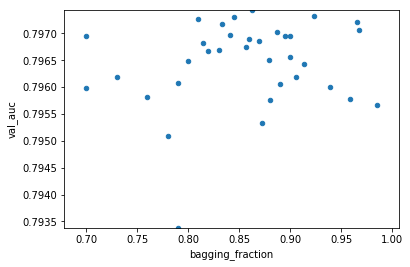

In [30]:
temp.plot(x='bagging_fraction', y='val_auc', kind='scatter', ylim=[temp['val_auc'].min(),temp['val_auc'].max()])

In [ ]:
gs_xgb2_res = pd.read_csv('output/xgb_bo2_w2v_newcat_grid_search.csv', index_col='Unnamed: 0').sort_values(by=['val_auc'], ascending=False)
#0.829998
gs_xgb2_res.head(20)

In [ ]:
import pandas as pd

gs_nn_res = pd.read_csv('output/nn_grid_search.csv', index_col='Unnamed: 0').sort_values(by=['val_auc'], ascending=False)

gs_nn_res.head()

In [ ]:
stacknet_res = pd.read_csv('output/oof/stacknet_report.csv').sort_values(by=['oof_cv_score'], ascending=False)
stacknet_res

In [ ]:
stacknet_res[stacknet_res.model_data == 'IJCq__NN_layer2']['chosen model_data'].tolist()

In [ ]:
# 1. oof_cv_score vs. gs_val_auc
# for NN, oof_cv_score != gs_val_auc is normal, because gs_val_auc is get by train+val in grid search, while 
# oof_cv_score is got by nfolds cv
# for LGB, if gs_cv is true in config file, then oof_cv_score == gs_val_auc (almost). otherwise, based on the same
# reason as NN, oof_cv_score != gs_val_auc is normal 

# 2. test_score
# for NN: the one(not showing in log) is got by train+val and load_weights when doing prediction after grid search
# (when do_preds is true in config file), and test_score is got during oof where all trainig data are used. It's 
# normal that they are not equal
# for LGB, since model is retrain using all training data when doing prediction after grid search, the one is not in 
# log == test_score

In [ ]:
import os
import sys
#nb_dir = os.path.split(os.getcwd())[0]
#if nb_dir not in sys.path:
#    sys.path.append(nb_dir)
    
autolib_dir = '/home/kai/data/shiyi/AlphaBoosting/automl'
if autolib_dir not in sys.path:
    sys.path.append(autolib_dir)

print(sys.path)

%load_ext autoreload
%autoreload 2

In [ ]:
from automl_libs import BaseLayerResultsRepo

In [ ]:
repo = BaseLayerResultsRepo(['label'], 'output/oof/', load_from_file=True)

In [ ]:
for m,s in repo.show_scores():
    print(s,m)

In [ ]:
gs_nn_res.head(0).T.to_dict()